In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.dates as mdates
import matplotlib.cbook as cbook


In [44]:
df_b7_init = pd.read_csv('44009.csv')
df_b8_init = pd.read_csv('44065.csv')

In [45]:
def plot_df(df, x,y1, y2, title="", xlabel='Date', dpi=100):
    
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(111)
    ax1.plot(x, y1)
    ax1.set_ylabel('Windspeed')
    #plt.setp(fig, rotation=90)
    plt.xticks(rotation=90)
    ax2 = ax1.twinx()
    ax2.plot(x, y2, 'r-')
    ax2.set_ylabel('Pressure', color='r')
    for tl in ax2.get_yticklabels():
        tl.set_color('r')

In [46]:

keep_col = ['day','month','datetime','waveperiod','waveheight','WindDir','windspeed','pressure','possibility','hurrthreat']
df_b7 = df_b7_init[keep_col]
df_b6=df_b6_init[keep_col]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

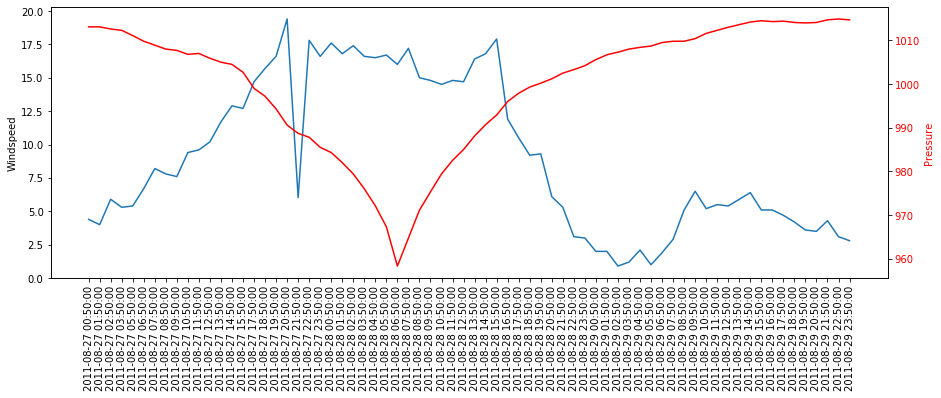

In [47]:

mean = df_b7.loc[df_b7['pressure']<2000,'pressure'].mean()
df_b7["pressure"] = np.where(df_b7["pressure"] >2000, mean,df_b7['pressure'])

mean = df_b7.loc[df_b7['windspeed']<20,'windspeed'].mean()
df_b7["windspeed"] = np.where(df_b7["windspeed"] >20, mean,df_b7['windspeed'])


rs_09 = df_b7.loc[ (df_b7['month']==8) & ( (df_b7['day']==27) | (df_b7['day']==28) | (df_b7['day']==29) )]
rs_09['date'] = rs_09['datetime'].astype('datetime64[ns]')
rs_09.head()
plot_df(rs_09, x=rs_09.datetime,y1=rs_09.windspeed, y2=rs_09.pressure, title='Pressure in month of August')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



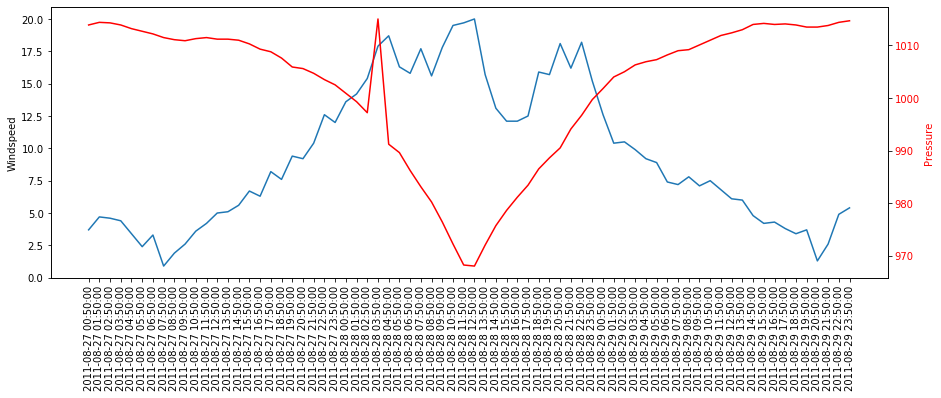

In [48]:

mean = df_b8.loc[df_b8['pressure']<2000,'pressure'].mean()
df_b8["pressure"] = np.where(df_b8["pressure"] >2000, mean,df_b8['pressure'])

mean = df_b8.loc[df_b8['windspeed']<20,'windspeed'].mean()
df_b8["windspeed"] = np.where(df_b8["windspeed"] >20, mean,df_b8['windspeed'])


rs_65 = df_b8.loc[ (df_b8['month']==8) & ( (df_b8['day']==27) | (df_b8['day']==28) | (df_b8['day']==29) )]
rs_65['date'] = rs_65['datetime'].astype('datetime64[ns]')
rs_65.head()
plot_df(rs_65, x=rs_65.datetime,y1=rs_65.windspeed, y2=rs_65.pressure, title='Pressure in month of August')

Text(0, 0.5, 'pressure')

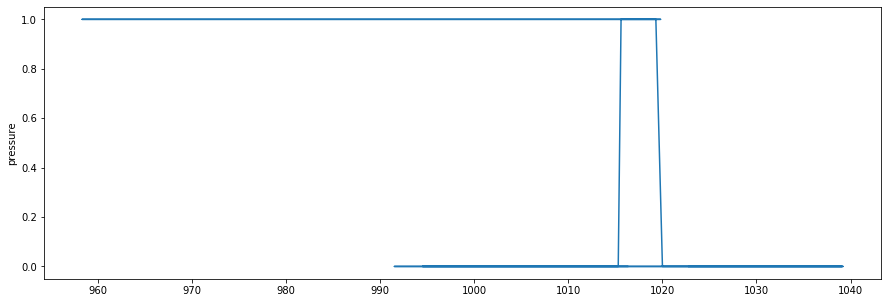

In [50]:
x=df_b7['pressure']
y1=df_b7['hurrthreat']
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('pressure')